In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import sys

In [12]:
##### Load the synthetic dataset:
# a. Load single CSV files in separate dfs
# b. Merge the dfs into one single "synthetic_dataset"

folder_path = '../data/synthetic_dataset' # NOTE: May need to adjust if the script is used from another folder

csv_files = glob.glob(os.path.join(folder_path, '*.csv')) # use glob library to find all CSV files

dfs = [] #to store individual DataFrames.

for file in csv_files:
    data = pd.read_csv(file, parse_dates=['time'], sep=',')
    # 'parse_dates' argument ensures the 'time' column is interpreted as datetime objects.
    
    dfs.append(data)

syn_ds = dfs[0] # Start with the first DataFrame as the base for merging.

for data in dfs[1:]:
    # Merge each subsequent DataFrame with the base DataFrame (`syn_ds`).
    # The merge is done using an ordered merge on the 'time' column.
    # This ensures that the merged dataset remains sorted by 'time'.
    syn_ds = pd.merge_ordered(syn_ds, data, on='time')

#-------------------------------------------------------------------------------
# Features and target variables:

syn_ds["time"] = pd.to_datetime(syn_ds["time"])
syn_ds["doy"] = syn_ds["time"].dt.dayofyear
syn_ds["hour"] = syn_ds["time"].dt.hour

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_actual_vs_predicted(syn_ds, models, results_dir='../results'):
    plt.figure(figsize=(12, 6))

    # Check if 'time' column exists in syn_ds, otherwise use the index
    time_column = 'time' if 'time' in syn_ds.columns else syn_ds.index.name
    
    # Plot the actual y values (syn_ds['LE']) in the background
    plt.plot(syn_ds[time_column], syn_ds['LE'], label='Actual', color='gray', alpha=0.5)
    
    for model in models:
        predictions_file = f"{results_dir}/{model}_predictions.csv"
        predictions_df = pd.read_csv(predictions_file)
        
        # Ensure the predictions are aligned with syn_ds' time index
        aligned_predictions = pd.DataFrame(index=syn_ds.index)  # Initialize with syn_ds index
        
        # Initialize the 'Predicted' column as NaN, which represents missing values (gaps)
        aligned_predictions['Predicted'] = np.nan
        
        # Match the indices from predictions_df to syn_ds indices (where predictions exist)
        for idx, pred in zip(predictions_df['index'], predictions_df['Predicted']):
            if idx in aligned_predictions.index:
                aligned_predictions.loc[idx, 'Predicted'] = pred

        # Add the 'time' column from syn_ds to aligned_predictions
        aligned_predictions['time'] = syn_ds[time_column]

        # Plot the predicted values (gaps will naturally show as NaNs)
        plt.plot(aligned_predictions['time'], aligned_predictions['Predicted'], 
                 label=f'{model} Predicted', alpha=0.7)
    
    plt.xlabel('Time')
    plt.ylabel('Latent Heat Flux (LE)')
    plt.legend(loc='upper left')
    plt.title('Actual vs Predicted y Values')
    plt.grid(True)
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../results/random_forest_random_gaps_1_predictions.csv'

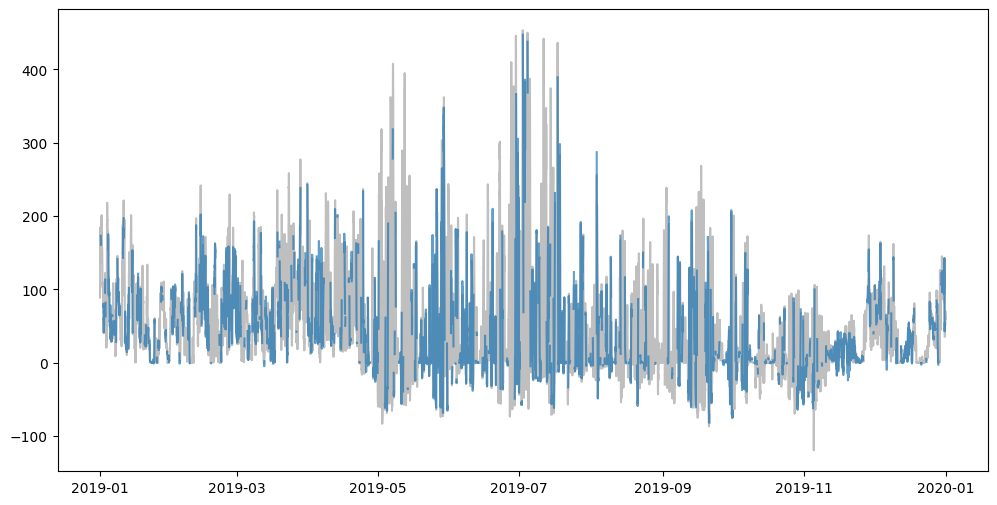

In [ ]:
# Plotting
models = ['xgboost_random_gaps_1']  # List your models here
plot_actual_vs_predicted(syn_ds, models)